In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [2]:
def percent_scaling(series):
    return (series / 100)

def cpu_scaling(series):
    return (series * 4 / 100)

def single_cpu_scaling(series):
    return (((series - 100) * (-1)) / 100)

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [3]:
cpu_df = pd.read_csv('../results/matrix-numa.csv')

cpu_df['cache_hit_rate_0'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_0']) / cpu_df['cache_hit_0']
cpu_df['cache_hit_rate_1'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_1']) / cpu_df['cache_hit_1']
cpu_df['cache_hit_rate_2'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_2']) / cpu_df['cache_hit_2']
cpu_df['cache_hit_rate_3'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_3']) / cpu_df['cache_hit_3']
cpu_df['cache_hit_rate_avg'] = (cpu_df['cache_hit_rate_0'] + cpu_df['cache_hit_rate_1'] + cpu_df['cache_hit_rate_2'] + cpu_df['cache_hit_rate_3']) / 4

cpu_df['br_miss_rate_0'] = cpu_df['br_miss_0'] / cpu_df['br_insns_0']
cpu_df['br_miss_rate_1'] = cpu_df['br_miss_1'] / cpu_df['br_insns_1']
cpu_df['br_miss_rate_2'] = cpu_df['br_miss_2'] / cpu_df['br_insns_2']
cpu_df['br_miss_rate_3'] = cpu_df['br_miss_3'] / cpu_df['br_insns_3']
cpu_df['br_miss_rate_avg'] = (cpu_df['br_miss_rate_0'] + cpu_df['br_miss_rate_1'] + cpu_df['br_miss_rate_2'] + cpu_df['br_miss_rate_3']) / 4

cpu_df['clock_speed'] = (cpu_df['insns_0'] + cpu_df['insns_1'] + cpu_df['insns_2'] + cpu_df['insns_3']) / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df = cpu_df.drop(index=0)

cpu_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,freq_0,...,cache_hit_rate_1,cache_hit_rate_2,cache_hit_rate_3,cache_hit_rate_avg,br_miss_rate_0,br_miss_rate_1,br_miss_rate_2,br_miss_rate_3,br_miss_rate_avg,clock_speed
1,2691,1.944,41410,17962,6689,49,1839,269,12316,1000000,...,2.108613,2.104964,0.095378,1.325407,0.146275,0.145540,0.145161,0.071332,0.127077,110.913761
2,4241,1.944,34196,15660,5781,47,1506,217,8640,1000000,...,1.799438,1.798876,0.082494,1.168169,0.144090,0.142410,0.136150,0.066108,0.122190,114.068387
3,5791,1.944,34102,15662,5788,47,1504,215,8694,1000000,...,1.801062,1.799813,0.081686,1.168610,0.142952,0.133020,0.133020,0.065680,0.118668,115.636129
4,7334,1.944,34136,15662,5786,43,1506,212,8704,1000000,...,1.801000,1.799188,0.082869,1.168906,0.140770,0.133020,0.134585,0.063811,0.118047,115.077771
5,8921,1.696,39433,18766,6861,46,1889,266,11450,1000000,...,2.136832,2.136207,0.102554,1.342222,0.140815,0.140845,0.133020,0.064334,0.119754,113.204789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44534,85867080,2.124,385838,281251,104991,1052,71448,1853,188760,1000000,...,29.795629,29.836839,29.744970,22.591855,0.025935,0.131054,0.128940,0.126062,0.102998,201.801418
44535,85868638,1.864,383606,280188,104460,1042,71309,1760,187630,1000000,...,29.653322,29.693204,29.586119,22.480668,0.024681,0.128205,0.128940,0.126062,0.101972,200.195764
44536,85870213,1.864,384577,281824,104941,1030,72172,1799,188162,1000000,...,29.798069,29.821489,29.797785,22.601882,0.024927,0.129630,0.128940,0.128205,0.102925,199.099048
44537,85871770,1.864,380460,278786,103895,997,71127,1737,186062,1000000,...,29.501278,29.516624,29.484530,22.373209,0.024421,0.128205,0.130372,0.129630,0.103157,199.432241


In [4]:
cpu_df.drop('time', axis=1).corr()['current']

current               1.000000
cpu_cycles_0          0.379546
insns_0               0.362891
cache_hit_0           0.350475
cache_miss_0          0.397269
br_insns_0            0.207099
br_miss_0             0.084071
bus_cycles_0          0.379859
freq_0                0.131316
cpu_cycles_1          0.477603
insns_1               0.474445
cache_hit_1           0.469217
cache_miss_1          0.527512
br_insns_1            0.320919
br_miss_1             0.165341
bus_cycles_1          0.478266
freq_1                0.131316
cpu_cycles_2          0.360475
insns_2               0.354235
cache_hit_2           0.349350
cache_miss_2          0.386839
br_insns_2            0.254643
br_miss_2             0.135926
bus_cycles_2          0.361188
freq_2                0.131316
cpu_cycles_3          0.257701
insns_3               0.266003
cache_hit_3           0.279737
cache_miss_3          0.229825
br_insns_3            0.255929
br_miss_3             0.262884
bus_cycles_3          0.259226
freq_3  

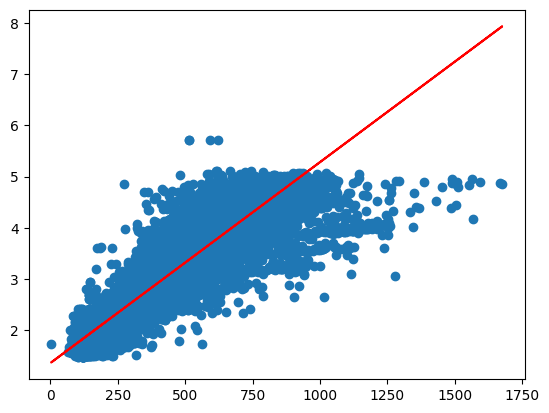

In [5]:
cpu_linear = LinearRegression()
cpu_linear.fit(cpu_df['clock_speed'].values.reshape(-1, 1),
               cpu_df['current'].values.reshape(-1, 1))

plt.scatter(cpu_df['clock_speed'].values.reshape(-1, 1),
            cpu_df['current'].values.reshape(-1, 1))
plt.plot(cpu_df['clock_speed'].values.reshape(-1, 1),
         cpu_linear.predict(cpu_df['clock_speed'].values.reshape(-1, 1)),
         color='red')

In [6]:
#filtering out outliers to better see patterns in cpu_cycles

# calculate IQR for column A
Q1 = cpu_df['clock_speed'].quantile(0.25)
Q3 = cpu_df['clock_speed'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = cpu_df[(cpu_df['clock_speed'] < Q1 - threshold * IQR) | (cpu_df['clock_speed'] > Q3 + threshold * IQR)]

In [7]:
filtered_cpu = cpu_df.drop(outliers.index)

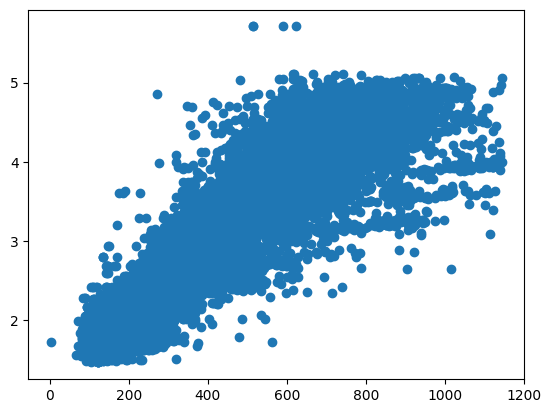

In [8]:
plt.scatter(filtered_cpu["clock_speed"].values.reshape(-1, 1),
            filtered_cpu['current'].values.reshape(-1, 1))

In [9]:
from sklearn.model_selection import train_test_split

df_X = cpu_df.drop(columns=['current', 'time'])
df_Y = cpu_df['current'].astype(int)
X_dev, X_test, y_dev, y_test = train_test_split(df_X, df_Y, random_state=42, test_size=0.2)

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_dev, y_dev)
rf.score(X_test, y_test)

0.9254232648446525

In [11]:
feature_names = df_X.columns
feature_imps = zip(feature_names, rf.feature_importances_)
feature_imps = sorted(list(feature_imps), key=lambda x: x[1], reverse=True)
feature_imps

[('cpu_cycles_1', 0.6924677007914993),
 ('bus_cycles_2', 0.0552551280349578),
 ('bus_cycles_0', 0.05462965949237933),
 ('cpu_cycles_0', 0.03229482313417644),
 ('cpu_cycles_3', 0.030325470791242846),
 ('clock_speed', 0.02764538910342575),
 ('bus_cycles_1', 0.009382617752196176),
 ('cache_miss_2', 0.006196394130085957),
 ('cache_hit_rate_avg', 0.005908905014164206),
 ('freq_0', 0.0051216545421582955),
 ('freq_1', 0.0048350435982645),
 ('freq_3', 0.004083714124765085),
 ('cache_miss_0', 0.0039625990080547485),
 ('br_miss_rate_avg', 0.00383713921666714),
 ('insns_2', 0.00379215112226288),
 ('freq_2', 0.003458025656744896),
 ('br_miss_rate_3', 0.003417863583802385),
 ('br_insns_2', 0.0032715135306102447),
 ('cpu_cycles_2', 0.0031056662645562788),
 ('br_miss_rate_0', 0.0030322645647365113),
 ('bus_cycles_3', 0.0029713129488732597),
 ('insns_1', 0.002823298698600481),
 ('br_miss_rate_2', 0.0028167647176406945),
 ('cache_hit_rate_0', 0.0027742065370434934),
 ('br_insns_0', 0.002340633679250668

<Axes: xlabel='time'>

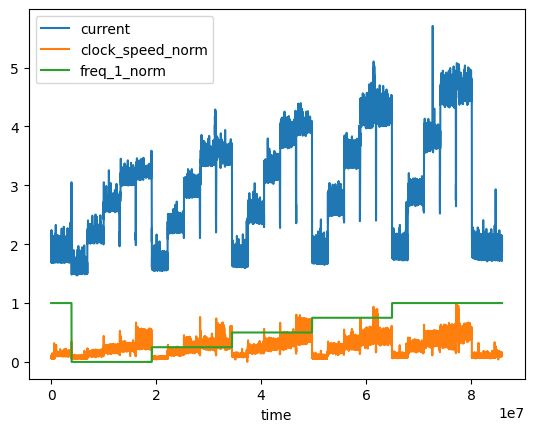

In [12]:
cpu_df['clock_speed_norm'] = min_max_scaling(cpu_df['clock_speed'])
cpu_df['freq_1_norm'] = min_max_scaling(cpu_df['freq_1'])

cpu_df.plot(x='time', y=['current', 'clock_speed_norm', 'freq_1_norm'])

In [13]:
mem_df = pd.read_csv('../results/mem-numa.csv')

mem_df['cache_hit_rate_0'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_0']) / mem_df['cache_hit_0']
mem_df['cache_hit_rate_1'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_1']) / mem_df['cache_hit_1']
mem_df['cache_hit_rate_2'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_2']) / mem_df['cache_hit_2']
mem_df['cache_hit_rate_3'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_3']) / mem_df['cache_hit_3']
mem_df['cache_hit_rate_avg'] = (mem_df['cache_hit_rate_0'] + mem_df['cache_hit_rate_1'] + mem_df['cache_hit_rate_2'] + mem_df['cache_hit_rate_3']) / 4

mem_df['br_miss_rate_0'] = mem_df['br_miss_0'] / mem_df['br_insns_0']
mem_df['br_miss_rate_1'] = mem_df['br_miss_1'] / mem_df['br_insns_1']
mem_df['br_miss_rate_2'] = mem_df['br_miss_2'] / mem_df['br_insns_2']
mem_df['br_miss_rate_3'] = mem_df['br_miss_3'] / mem_df['br_insns_3']
mem_df['br_miss_rate_avg'] = (mem_df['br_miss_rate_0'] + mem_df['br_miss_rate_1'] + mem_df['br_miss_rate_2'] + mem_df['br_miss_rate_3']) / 4

mem_df['clock_speed'] = (mem_df['insns_0'] + mem_df['insns_1'] + mem_df['insns_2'] + mem_df['insns_3']) / (mem_df['time'] - mem_df['time'].shift())
mem_df = mem_df.drop(index=0)

mem_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,freq_0,...,cache_hit_rate_1,cache_hit_rate_2,cache_hit_rate_3,cache_hit_rate_avg,br_miss_rate_0,br_miss_rate_1,br_miss_rate_2,br_miss_rate_3,br_miss_rate_avg,clock_speed
1,205393,1.200,580872,375486,146089,2146,83058,4164,286145,600000,...,41.432908,41.446935,1.220947,21.271525,0.050134,0.135021,0.134561,0.255589,0.143826,6.666416
2,307686,1.252,506424,342104,131755,1863,78656,3404,249020,600000,...,37.926576,37.380250,2.262329,19.638754,0.043277,0.124457,0.131728,0.248202,0.136916,4.908352
3,410002,1.196,581977,374679,144320,2415,82320,4669,286713,600000,...,17.244944,40.945800,5.778712,16.238181,0.056718,0.268827,0.131728,0.219072,0.169086,4.592214
4,512236,1.200,604266,386294,150581,2315,84081,4660,297951,600000,...,42.743896,42.770739,6.578795,23.269514,0.055423,0.128205,0.128205,0.225564,0.134349,4.533179
5,614508,1.200,549676,363179,140431,2188,80682,4273,270651,600000,...,40.506347,40.404029,9.629268,22.881016,0.052961,0.125184,0.127219,0.200318,0.126421,4.108260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,16176106,1.204,564624,371632,143920,2134,81864,4506,278128,600000,...,41.368603,40.832293,40.808565,30.998658,0.055043,0.127168,0.133144,0.131728,0.111771,3.938032
136,16278370,1.200,542725,362460,140225,1969,80699,4303,267179,600000,...,40.353195,40.298362,18.767015,25.101133,0.053322,0.124269,0.127941,0.174356,0.119972,3.930249
137,16380633,1.200,585103,382324,148131,2259,82482,4967,288306,600000,...,42.665802,42.015319,42.026390,31.923065,0.060219,0.123010,0.127298,0.130312,0.110210,4.042635
138,16482892,1.200,543770,360861,139920,2006,80178,4104,267664,600000,...,40.346986,39.685674,8.511252,22.382394,0.051186,0.124457,0.128895,0.195004,0.124886,4.121799


In [14]:
mem_df.drop('time', axis=1).corr()['current']

current               1.000000
cpu_cycles_0          0.315226
insns_0               0.181948
cache_hit_0           0.180801
cache_miss_0          0.212801
br_insns_0            0.184503
br_miss_0             0.212298
bus_cycles_0          0.315093
freq_0                0.961324
cpu_cycles_1          0.944457
insns_1               0.879227
cache_hit_1           0.921120
cache_miss_1          0.752031
br_insns_1            0.845494
br_miss_1             0.796072
bus_cycles_1          0.944457
freq_1                0.961324
cpu_cycles_2          0.508517
insns_2               0.499101
cache_hit_2           0.498005
cache_miss_2          0.496816
br_insns_2            0.499016
br_miss_2             0.493813
bus_cycles_2          0.508476
freq_2                0.961324
cpu_cycles_3          0.513633
insns_3               0.478125
cache_hit_3           0.475390
cache_miss_3          0.514436
br_insns_3            0.488036
br_miss_3             0.565082
bus_cycles_3          0.513636
freq_3  

In [15]:
mem_df['current_predict'] = cpu_linear.predict(mem_df['clock_speed'].values.reshape(-1, 1)).reshape(1, -1)[0]
mem_df['current_diff'] = mem_df['current'] - mem_df['current_predict']
mem_df.drop('time', axis=1).corr()['current_diff']

current              -0.843461
cpu_cycles_0         -0.120183
insns_0              -0.058955
cache_hit_0          -0.059500
cache_miss_0         -0.012893
br_insns_0           -0.056725
br_miss_0            -0.028117
bus_cycles_0         -0.119990
freq_0               -0.821615
cpu_cycles_1         -0.886468
insns_1              -0.940177
cache_hit_1          -0.932070
cache_miss_1         -0.657607
br_insns_1           -0.940980
br_miss_1            -0.562287
bus_cycles_1         -0.886474
freq_1               -0.821615
cpu_cycles_2         -0.619806
insns_2              -0.618459
cache_hit_2          -0.616211
cache_miss_2         -0.583088
br_insns_2           -0.615954
br_miss_2            -0.596290
bus_cycles_2         -0.619770
freq_2               -0.821615
cpu_cycles_3         -0.300631
insns_3              -0.268574
cache_hit_3          -0.265585
cache_miss_3         -0.289883
br_insns_3           -0.278725
br_miss_3            -0.335817
bus_cycles_3         -0.300659
freq_3  

<Axes: xlabel='time'>

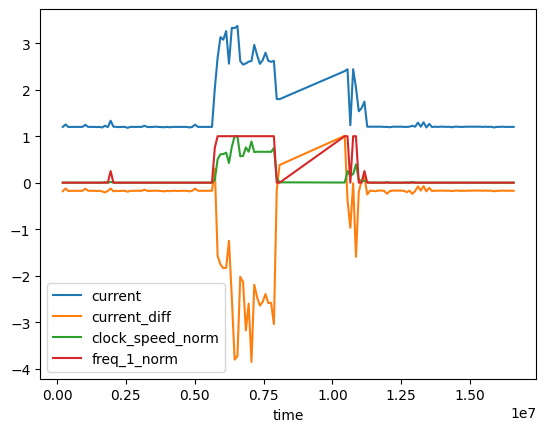

In [16]:
mem_df['clock_speed_norm'] = min_max_scaling(mem_df['clock_speed'])
mem_df['freq_1_norm'] = min_max_scaling(mem_df['freq_1'])

mem_df.plot(x='time', y=['current', 'current_diff', 'clock_speed_norm', 'freq_1_norm'])

In [17]:
from sklearn.model_selection import train_test_split

mem_df_X = mem_df.drop(columns=['current'])
mem_df_Y = mem_df['current'].astype(int)
X_dev, X_test, y_dev, y_test = train_test_split(mem_df_X, mem_df_Y, random_state=42, test_size=0.2)


In [18]:
from sklearn.ensemble import RandomForestRegressor
rf_mem = RandomForestRegressor(random_state=42)
rf_mem.fit(X_dev, y_dev)
rf_mem.score(X_test, y_test)

0.8472444444444445

In [19]:
feature_names = mem_df_X.columns
feature_imps = zip(feature_names, rf_mem.feature_importances_)
feature_imps=sorted(list(feature_imps), key=lambda x: x[1], reverse=True)
feature_imps

[('freq_1', 0.10668808050250482),
 ('freq_2', 0.10585022647445744),
 ('freq_1_norm', 0.09633594783226536),
 ('cache_miss_1', 0.09273395392305575),
 ('bus_cycles_1', 0.07029948475254195),
 ('freq_3', 0.06980080706876299),
 ('cpu_cycles_1', 0.061684019641631546),
 ('freq_0', 0.06146649575144502),
 ('insns_1', 0.061175362953879465),
 ('cache_hit_1', 0.045845007319804),
 ('current_predict', 0.044725769872239675),
 ('cache_hit_rate_3', 0.03884896199388572),
 ('clock_speed_norm', 0.017779704120635148),
 ('bus_cycles_3', 0.01639810311860844),
 ('cpu_cycles_3', 0.01567812161381952),
 ('insns_3', 0.015271137942977622),
 ('br_miss_1', 0.009636496687622216),
 ('clock_speed', 0.009090499369509925),
 ('br_miss_rate_1', 0.009021385707279068),
 ('cache_hit_rate_1', 0.008931322207958926),
 ('bus_cycles_2', 0.008730421443565306),
 ('cache_miss_3', 0.008342415700332671),
 ('cache_hit_3', 0.00705499262516776),
 ('time', 0.0068286520500621985),
 ('br_miss_rate_3', 0.0025177652013400474),
 ('cache_hit_2', 